# part2 resume w adding terms -------------->

# adding interaction & squared terms for better results in LR

In [4]:
import pandas as pd

In [5]:
#extract x&y
train_data = pd.read_csv('train_data.csv')
X_train_selected = train_data.drop(columns=['y1_train', 'y2_train'])
y1_train = train_data['y1_train']
y2_train = train_data['y2_train']

val_data = pd.read_csv('val_data.csv')
X_val_selected = val_data.drop(columns=['y1_val', 'y2_val'])
y1_val = val_data['y1_val']
y2_val = val_data['y2_val']

test_data = pd.read_csv('test_data.csv')
X_test_selected = test_data.drop(columns=['y1_test', 'y2_test'])
y1_test = test_data['y1_test']
y2_test = test_data['y2_test']

In [6]:
X_train_selected
# X_val_selected
# X_test_selected
# y2_train
# y2_val
# y2_test

,"Ice vol mean radius, Mean (um)",Total contrail EF (J),"Temp initial, Mean (K)","Tau cirrus, Mean","Ice number initial, Mean (m-1)",RF LW (W m-2),RF SW (W m-2),"RHi initial, Mean",Mean nvPM number EI (kg-1),"Tau contrail, Mean"
0,8.104943,-9.803122e+13,211.988027,0.059461,8.171083e+11,1.274654,-2.136018,0.965391,9.737014e+14,0.032228
1,11.396851,6.526151e+14,214.539888,0.230156,4.825063e+12,2.709673,-0.462785,1.077596,1.409608e+15,0.086032
2,1.174947,-6.665474e+11,206.463294,0.017427,4.640423e+12,0.447756,-0.318402,0.934291,1.517921e+15,0.045242
3,5.127562,6.506736e+13,210.716904,0.024615,2.980002e+12,1.514753,-1.687507,1.118627,5.143456e+14,0.046715
4,14.515607,1.870152e+13,223.596470,0.348228,3.710018e+12,4.307649,-2.705854,1.201717,5.576476e+14,0.222517
...,...,...,...,...,...,...,...,...,...,...
213655,6.287990,-5.848262e+13,205.665296,0.037373,4.442903e+12,3.004852,-3.928538,1.026555,3.800872e+14,0.035124
213656,13.782106,2.838121e+14,220.456859,0.151028,2.869579e+12,9.203848,-4.468458,1.199525,5.534915e+14,0.267492
213657,6.192778,4.031556e+14,208.486587,0.128156,4.726921e+12,2.685974,-1.603496,1.024720,1.132473e+15,0.066817
213658,0.448273,0.000000e+00,215.152319,0.000000,2.826432e+12,0.879319,-7.044063,0.865739,1.249643e+15,0.081751


In [7]:
#extract top 10 features from part1
X_train_selected_lr =X_train_selected.copy()
X_val_selected_lr = X_val_selected.copy()
X_test_selected_lr = X_test_selected.copy()

top_features = X_train_selected_lr.columns
top_features

Index(['Ice vol mean radius, Mean (um)', 'Total contrail EF (J)',
       'Temp initial, Mean (K)', 'Tau cirrus, Mean',
       'Ice number initial, Mean (m-1)', 'RF LW (W m-2)', 'RF SW (W m-2)',
       'RHi initial, Mean', 'Mean nvPM number EI (kg-1)',
       'Tau contrail, Mean'],
      dtype='object')

In [8]:
#X input for LR - add iteraction & squared terms to address heteroscadasticity & non-linearity in LR 

#add interaction terms for top 10 features
for i, featureA in enumerate(top_features):
    for j, featureB in enumerate(top_features):
        if i < j:
            name = f"{featureA}_x_{featureB}"
            X_train_selected_lr[name] = X_train_selected_lr[featureA] * X_train_selected_lr[featureB]
            X_val_selected_lr[name] = X_val_selected_lr[featureA] * X_val_selected_lr[featureB]
            X_test_selected_lr[name] = X_test_selected_lr[featureA] * X_test_selected_lr[featureB]

#add squared terms for top 10 features
for feature in top_features:
    name = f"{feature}^2"
    X_train_selected_lr[name] = X_train_selected_lr[feature] ** 2
    X_val_selected_lr[name] = X_val_selected_lr[feature] ** 2
    X_test_selected_lr[name] = X_test_selected_lr[feature] ** 2

In [9]:
X_train_selected_lr

,"Ice vol mean radius, Mean (um)",Total contrail EF (J),"Temp initial, Mean (K)","Tau cirrus, Mean","Ice number initial, Mean (m-1)",RF LW (W m-2),RF SW (W m-2),"RHi initial, Mean",Mean nvPM number EI (kg-1),"Tau contrail, Mean",...,"Ice vol mean radius, Mean (um)^2",Total contrail EF (J)^2,"Temp initial, Mean (K)^2","Tau cirrus, Mean^2","Ice number initial, Mean (m-1)^2",RF LW (W m-2)^2,RF SW (W m-2)^2,"RHi initial, Mean^2",Mean nvPM number EI (kg-1)^2,"Tau contrail, Mean^2"
0,8.104943,-9.803122e+13,211.988027,0.059461,8.171083e+11,1.274654,-2.136018,0.965391,9.737014e+14,0.032228,...,65.690098,9.610120e+27,44938.923694,0.003536,6.676659e+23,1.624744,4.562573,0.931979,9.480945e+29,0.001039
1,11.396851,6.526151e+14,214.539888,0.230156,4.825063e+12,2.709673,-0.462785,1.077596,1.409608e+15,0.086032,...,129.888210,4.259064e+29,46027.363661,0.052972,2.328124e+25,7.342329,0.214170,1.161214,1.986995e+30,0.007402
2,1.174947,-6.665474e+11,206.463294,0.017427,4.640423e+12,0.447756,-0.318402,0.934291,1.517921e+15,0.045242,...,1.380502,4.442854e+23,42627.091854,0.000304,2.153352e+25,0.200485,0.101380,0.872900,2.304084e+30,0.002047
3,5.127562,6.506736e+13,210.716904,0.024615,2.980002e+12,1.514753,-1.687507,1.118627,5.143456e+14,0.046715,...,26.291895,4.233761e+27,44401.613593,0.000606,8.880411e+24,2.294476,2.847681,1.251325,2.645514e+29,0.002182
4,14.515607,1.870152e+13,223.596470,0.348228,3.710018e+12,4.307649,-2.705854,1.201717,5.576476e+14,0.222517,...,210.702857,3.497468e+26,49995.381413,0.121263,1.376424e+25,18.555836,7.321647,1.444123,3.109708e+29,0.049514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213655,6.287990,-5.848262e+13,205.665296,0.037373,4.442903e+12,3.004852,-3.928538,1.026555,3.800872e+14,0.035124,...,39.538822,3.420217e+27,42298.214106,0.001397,1.973939e+25,9.029133,15.433409,1.053815,1.444663e+29,0.001234
213656,13.782106,2.838121e+14,220.456859,0.151028,2.869579e+12,9.203848,-4.468458,1.199525,5.534915e+14,0.267492,...,189.946435,8.054931e+28,48601.226511,0.022809,8.234485e+24,84.710820,19.967120,1.438860,3.063528e+29,0.071552
213657,6.192778,4.031556e+14,208.486587,0.128156,4.726921e+12,2.685974,-1.603496,1.024720,1.132473e+15,0.066817,...,38.350504,1.625344e+29,43466.657040,0.016424,2.234378e+25,7.214457,2.571200,1.050050,1.282496e+30,0.004465
213658,0.448273,0.000000e+00,215.152319,0.000000,2.826432e+12,0.879319,-7.044063,0.865739,1.249643e+15,0.081751,...,0.200948,0.000000e+00,46290.520266,0.000000,7.988718e+24,0.773202,49.618823,0.749503,1.561608e+30,0.006683


# standardisation

In [10]:
#standardisation
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#scaled wo added terms
X_train_scaled = scaler.fit_transform(X_train_selected)
X_val_scaled = scaler.transform(X_val_selected)
X_test_scaled = scaler.transform(X_test_selected)

#scaled w added terms (for LR)
X_train_scaled_lr = scaler.fit_transform(X_train_selected_lr)
X_val_scaled_lr = scaler.transform(X_val_selected_lr)
X_test_scaled_lr = scaler.transform(X_test_selected_lr)

# modelling - For 'Persistent contrail length (km)'

## 1. linear regression

In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [44]:
lr1 = LinearRegression()
lr1.fit(X_train_scaled_lr, y1_train)

LinearRegression()

In [48]:
#evaluate val
y1_pred_val_lr = lr1.predict(X_val_scaled_lr)
r1_val_lr = r2_score(y1_val, y1_pred_val_lr)
rmse_val_lr = np.sqrt(mean_squared_error(y1_val, y1_pred_val_lr))
mae_val_lr = mean_absolute_error(y1_val, y1_pred_val_lr)

print("Performance on Validation Data:")
print(f"R2 Score: {r1_val_lr:.4f}")
print(f"Mean Squared Error: {rmse_val_lr:.4f}")
print(f"Mean Absolute Error: {mae_val_lr:.4f}")

#evaluate test
y1_pred_test_lr = lr1.predict(X_test_scaled_lr)
r2_test_lr = r2_score(y1_test, y1_pred_test_lr)
rmse_test_lr = np.sqrt(mean_squared_error(y1_test, y1_pred_test_lr))
mae_test_lr = mean_absolute_error(y1_test, y1_pred_test_lr)

print("\nPerformance on Test Data:")
print(f"R2 Score: {r2_test_lr:.4f}")
print(f"Mean Squared Error: {rmse_test_lr:.4f}")
print(f"Mean Absolute Error: {mae_test_lr:.4f}")

Performance on Validation Data:
R2 Score: 0.4441
Mean Squared Error: 375.9126
Mean Absolute Error: 281.2264

Performance on Test Data:
R2 Score: 0.4547
Mean Squared Error: 372.1610
Mean Absolute Error: 280.8605


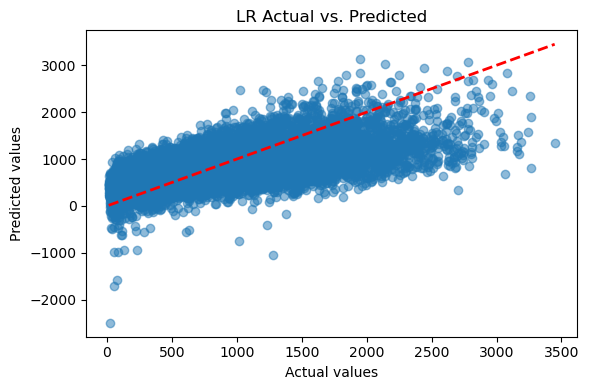

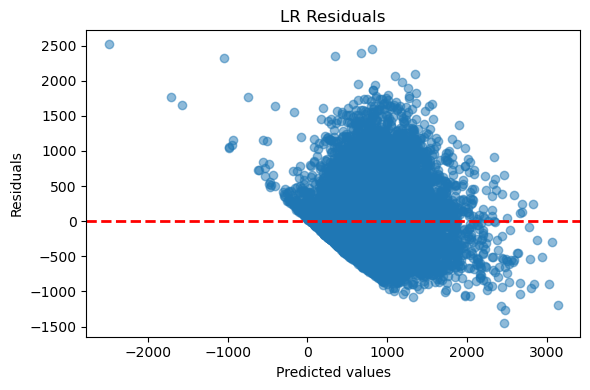

In [49]:
# 1. scatterplot of Actual vs. Predicted values
plt.figure(figsize=(6, 4))

plt.subplot(1, 1, 1)
plt.scatter(y1_test, y1_pred_test_lr, alpha=0.5)
plt.plot([min(y1_test), max(y1_test)], [min(y1_test), max(y1_test)], '--', lw=2, color='red')
plt.title("LR Actual vs. Predicted")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")

plt.tight_layout()
plt.show()

# 2. residualplots
plt.figure(figsize=(6, 4))

plt.subplot(1, 1, 1)
residuals1_lr = y1_test - y1_pred_test_lr
plt.scatter(y1_pred_test_lr, residuals1_lr, alpha=0.5)
plt.axhline(0, color='red', linestyle='--', lw=2)
plt.title("LR Residuals")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")

plt.tight_layout()
plt.show()

## 2. random forest

In [15]:
from sklearn.ensemble import RandomForestRegressor

In [17]:
rf1 = RandomForestRegressor(n_estimators=100, random_state=42)
rf1.fit(X_train_scaled, y1_train) #- takes 30mins!!!!

RandomForestRegressor(random_state=42)

In [50]:
from sklearn.metrics import mean_absolute_error

#evaluate val
y1_pred_val_rf = rf1.predict(X_val_scaled)
r2_val_rf = r2_score(y1_val, y1_pred_val_rf)
rmse_val_rf = np.sqrt(mean_squared_error(y1_val, y1_pred_val_rf))
mae_val_rf = mean_absolute_error(y1_val, y1_pred_val_rf)

print("Performance on Validation Data:")
print(f"R2 Score: {r2_val_rf:.4f}")
print(f"Mean Squared Error: {rmse_val_rf:.4f}")
print(f"Mean Absolute Error: {mae_val_rf:.4f}")

#evaluate test
y1_pred_test_rf = rf1.predict(X_test_scaled)
r2_test_rf = r2_score(y1_test, y1_pred_test_rf)
rmse_test_rf = np.sqrt(mean_squared_error(y1_test, y1_pred_test_rf))
mae_test_rf = mean_absolute_error(y1_test, y1_pred_test_rf)

print("\nPerformance on Test Data:")
print(f"R2 Score: {r2_test_rf:.4f}")
print(f"Mean Squared Error: {rmse_test_rf:.4f}")
print(f"Mean Absolute Error: {mae_test_rf:.4f}")

Performance on Validation Data:
R2 Score: 0.6488
Mean Squared Error: 298.7940
Mean Absolute Error: 217.3451

Performance on Test Data:
R2 Score: 0.6424
Mean Squared Error: 301.3764
Mean Absolute Error: 218.4801


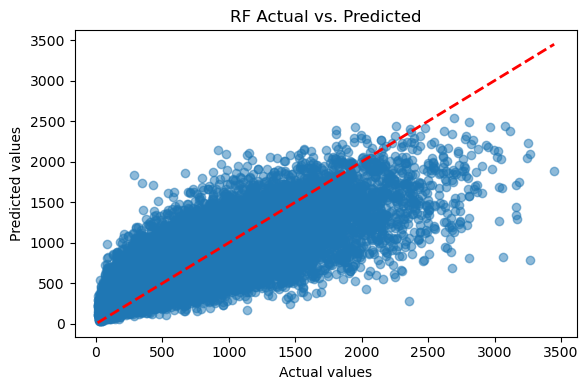

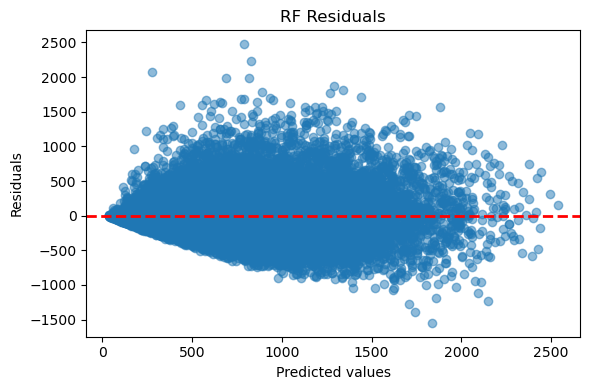

In [52]:
# 1. scatterplots of actual vs. predicted values - w added terms
plt.figure(figsize=(6, 4))

plt.subplot(1, 1, 1)
plt.scatter(y1_test, y1_pred_test_rf, alpha=0.5)
plt.plot([min(y1_test), max(y1_test)], [min(y1_test), max(y1_test)], '--', lw=2, color='red')
plt.title("RF Actual vs. Predicted")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")

plt.tight_layout()
plt.show()

# 2. residualplots
plt.figure(figsize=(6, 4))

plt.subplot(1, 1, 1)
residuals1_rf = y1_test - y1_pred_test_rf
plt.scatter(y1_pred_test_rf, residuals1_rf, alpha=0.5)
plt.axhline(0, color='red', linestyle='--', lw=2)
plt.title("RF Residuals")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")

plt.tight_layout()
plt.show()

## 3. xgboost

In [20]:
!pip install xgboost


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


### approach0 - GBT wo Log-Transform with Squared Error Objective

In [53]:
#Gradient boosting improved over LR wo added terms - slightly BETTER results
import xgboost as xgb
from sklearn.metrics import mean_absolute_error

#fit train data
xgb1 = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100)
xgb1.fit(X_train_scaled, y1_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [54]:
#evaluate val data 
y1_pred_val_xgb = xgb1.predict(X_val_scaled)
r2_val_xgb = r2_score(y1_val, y1_pred_val_xgb)
rmse_val_xgb = np.sqrt(mean_squared_error(y1_val, y1_pred_val_xgb))
mae_val_xgb = mean_absolute_error(y1_val, y1_pred_val_xgb)
print(f"XGBoost Validation Metrics: RMSE = {rmse_val_xgb}, MAE = {mae_val_xgb}, R2 = {r2_val_xgb}")

#evaluate test data
y1_pred_test_xgb = xgb1.predict(X_test_scaled)
r2_test_xgb = r2_score(y1_test, y1_pred_test_xgb)
rmse_test_xgb = np.sqrt(mean_squared_error(y1_test, y1_pred_test_xgb))
mae_test_xgb = mean_absolute_error(y1_test, y1_pred_test_xgb)
print(f"XGBoost Test Metrics for 'Contrail age, Mean (h)': RMSE = {rmse_test_xgb}, MAE = {mae_test_xgb}, R2 = {r2_test_xgb}")

XGBoost Validation Metrics: RMSE = 294.5378551952825, MAE = 214.97687486753608, R2 = 0.658723484171573
XGBoost Test Metrics for 'Contrail age, Mean (h)': RMSE = 295.84773776694516, MAE = 215.68647388185974, R2 = 0.6554237005899592


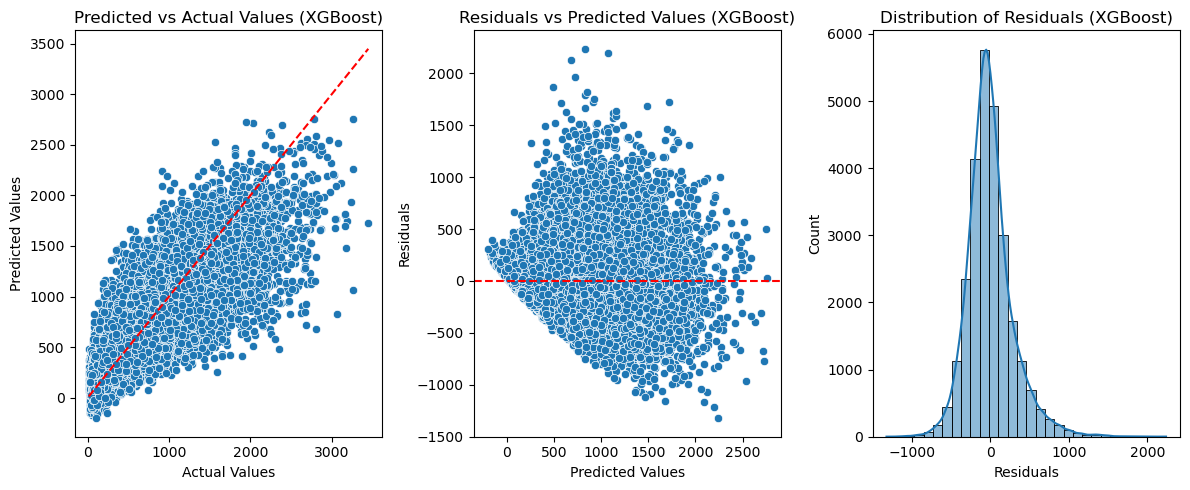

In [55]:
#evaluation wo added terms

import seaborn as sns

plt.figure(figsize=(12, 5))

#predicted vs actual
plt.subplot(1, 3, 1)
sns.scatterplot(x=y1_test, y=y1_pred_test_xgb)
plt.plot([min(y1_test), max(y1_test)], [min(y1_test), max(y1_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values (XGBoost)')

#residuals vs predicted
plt.subplot(1, 3, 2)
residuals1_xgb = y1_test - y1_pred_test_xgb
sns.scatterplot(x=y1_pred_test_xgb, y=residuals_xgb)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values (XGBoost)')

#residual dist
plt.subplot(1, 3, 3)
sns.histplot(residuals1_xgb, bins=30, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals (XGBoost)')

plt.tight_layout()
plt.show()

#### https://arxiv.org/abs/1708.00130v1 <- predict session length
#### https://arxiv.org/abs/1803.01440v2
#### https://xgboost.readthedocs.io/en/stable/python/examples/gamma_regression.html
#### https://xgboost.readthedocs.io/en/stable/parameter.html

### approach1 - GBT w Log-Transform with Squared Error Objective

In [57]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# log-transform target variable
y1_train_log = np.log1p(y1_train)  # Adding 1 to avoid log(0)
y1_val_log = np.log1p(y1_val)
y1_test_log = np.log1p(y1_test)

# create DMatrix for XGBoost
dtrain_log = xgb.DMatrix(X_train_scaled, label=y1_train_log)
dval_log = xgb.DMatrix(X_val_scaled, label=y1_val_log)
dtest_log = xgb.DMatrix(X_test_scaled, label=y1_test_log)

# define parameters for XGBoost
params_log = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    # 'max_depth': 5,
    # 'learning_rate': 0.1,
}

# train
bst_log1 = xgb.train(params_log, dtrain_log, num_boost_round=30, evals=[(dval_log, 'eval')])

# predict & back-transform predictions
y1_pred_val_log = np.expm1(bst_log1.predict(dval_log))
y1_pred_test_log = np.expm1(bst_log1.predict(dtest_log))

# evaluate val
rmse_val_log = np.sqrt(mean_squared_error(y1_val, y1_pred_val_log))
mae_val_log = mean_absolute_error(y1_val, y1_pred_val_log)
r2_val_log = r2_score(y1_val, y1_pred_val_log)

# evaluate test
rmse_test_log = np.sqrt(mean_squared_error(y1_test, y1_pred_test_log))
mae_test_log = mean_absolute_error(y1_test, y1_pred_test_log)
r2_test_log = r2_score(y1_test, y1_pred_test_log)

print(f"Log-transformed Model Validation Metrics: RMSE = {rmse_val_log}, MAE = {mae_val_log}, R2 = {r2_val_log}")
print(f"Log-transformed Model Test Metrics: RMSE = {rmse_test_log}, MAE = {mae_test_log}, R2 = {r2_test_log}")
#result worse than xgboost wo log-transformation

[0]	eval-rmse:0.74253
[1]	eval-rmse:0.67991
[2]	eval-rmse:0.63857
[3]	eval-rmse:0.60869
[4]	eval-rmse:0.58983
[5]	eval-rmse:0.57683
[6]	eval-rmse:0.56721
[7]	eval-rmse:0.55497
[8]	eval-rmse:0.54789
[9]	eval-rmse:0.54142
[10]	eval-rmse:0.53237
[11]	eval-rmse:0.52771
[12]	eval-rmse:0.52234
[13]	eval-rmse:0.51838
[14]	eval-rmse:0.51512
[15]	eval-rmse:0.51243
[16]	eval-rmse:0.50670
[17]	eval-rmse:0.50425
[18]	eval-rmse:0.50126
[19]	eval-rmse:0.49913
[20]	eval-rmse:0.49671
[21]	eval-rmse:0.49533
[22]	eval-rmse:0.49380
[23]	eval-rmse:0.49222
[24]	eval-rmse:0.48996
[25]	eval-rmse:0.48845
[26]	eval-rmse:0.48742
[27]	eval-rmse:0.48616
[28]	eval-rmse:0.48473
[29]	eval-rmse:0.48391
Log-transformed Model Validation Metrics: RMSE = 317.62908536246835, MAE = 222.9992536399111, R2 = 0.6031149935975839
Log-transformed Model Test Metrics: RMSE = 319.9780940717926, MAE = 224.04659933334958, R2 = 0.5969217247821438


### approach2 - GBT w Gamma Distribution with Log Link Function

In [59]:
#Gradient boosting improved over LR wo added terms & gamma loss func
import xgboost as xgb
from sklearn.metrics import mean_absolute_error

#fit train data
bst_gamma1 = xgb.XGBRegressor(objective='reg:gamma', n_estimators=100)
bst_gamma1.fit(X_train_scaled, y1_train)

#evaluate val data 
y1_pred_val_gamma = bst_gamma1.predict(X_val_scaled)
rmse_val_gamma = np.sqrt(mean_squared_error(y1_val, y1_pred_val_gamma))
mae_val_gamma = mean_absolute_error(y1_val, y1_pred_val_gamma)
r2_val_gamma = r2_score(y1_val, y1_pred_val_gamma)
print(f"XGBoost Validation Metrics: RMSE = {rmse_val_gamma}, MAE = {mae_val_gamma}, R2 = {r2_val_gamma}")

#evaluate test data
y1_pred_test_gamma = bst_gamma1.predict(X_test_scaled)
rmse_test_gamma = np.sqrt(mean_squared_error(y1_test, y1_pred_test_gamma))
mae_test_gamma = mean_absolute_error(y1_test, y1_pred_test_gamma)
r2_test_gamma = r2_score(y1_test, y1_pred_test_gamma)
print(f"XGBoost Test Metrics: RMSE = {rmse_test_gamma}, MAE = {mae_test_gamma}, R2 = {r2_test_gamma}")
#results BETTER than xbgoost wo gamma distribution

XGBoost Validation Metrics: RMSE = 296.530709332859, MAE = 213.41966458901848, R2 = 0.6540896814597428
XGBoost Test Metrics: RMSE = 297.6972054517416, MAE = 214.00761761611543, R2 = 0.651102053950408


## 4. FFNN

In [23]:
!pip install keras 


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [24]:
! pip install tensorflow


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [60]:
#FFNN w added terms

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # Suppress TensorFlow logging

from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_absolute_error

nn1 = Sequential()
nn1.add(Dense(128, input_dim=X_train_scaled_lr.shape[1], activation='relu')) #w added terms
nn1.add(Dense(64, activation='relu'))
nn1.add(Dense(32, activation='relu'))
nn1.add(Dense(1, activation='linear'))

nn1.compile(loss='mean_squared_error', optimizer='adam')
nn1.fit(X_train_scaled_lr, y1_train, epochs=5, batch_size=10, validation_data=(X_val_scaled_lr, y1_val))  #evaluate on val

y1_pred_test_nn = nn1.predict(X_test_scaled_lr)  #predict on test 

r2_test_nn = r2_score(y1_test, y1_pred_test_nn)
rmse_test_nn = np.sqrt(mean_squared_error(y1_test, y1_pred_test_nn))
mae_test_nn = mean_absolute_error(y1_test, y1_pred_test_nn)
print(f"Neural Network Metrics: RMSE = {rmse_test_nn}, MAE = {mae_test_nn}, R2 = {r2_test_nn}")  #on test data

Epoch 1/5
21366/21366 [==============================] - 22s 1ms/step - loss: 126802.3594 - val_loss: 107890.1797
Epoch 2/5
21366/21366 [==============================] - 22s 1ms/step - loss: 105593.0938 - val_loss: 103379.3828
Epoch 3/5
21366/21366 [==============================] - 22s 1ms/step - loss: 100959.8047 - val_loss: 97925.6875
Epoch 4/5
21366/21366 [==============================] - 22s 1ms/step - loss: 98326.7344 - val_loss: 99890.8672
Epoch 5/5
835/835 [==============================] - 1s 712us/step
Neural Network Metrics: RMSE = 315.9103774412351, MAE = 234.90452647871632, R2 = 0.6071048372300872


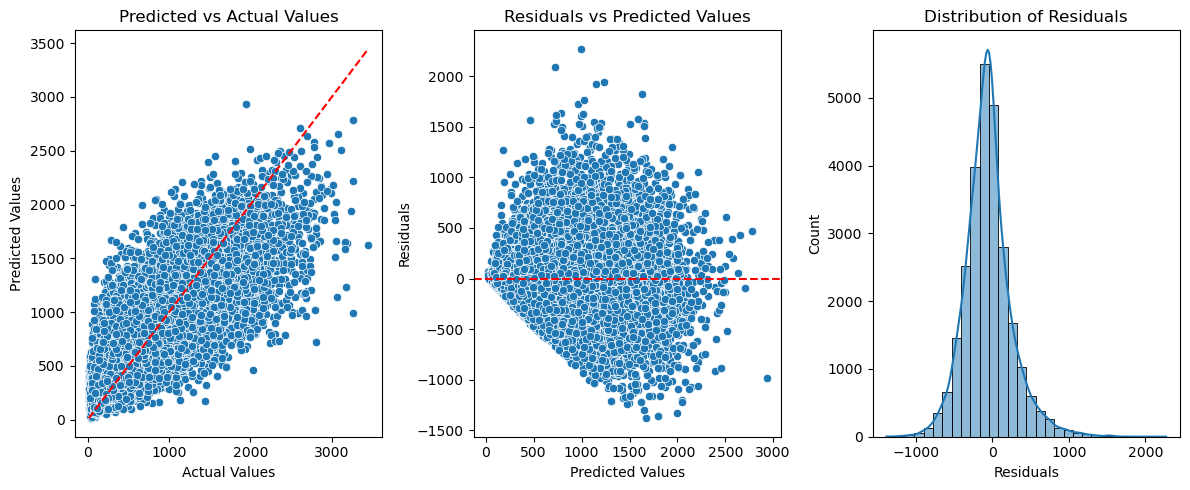

In [61]:
#evaluation - w added terms
import seaborn as sns

plt.figure(figsize=(12, 5))

#predicted vs actual
plt.subplot(1, 3, 1)
sns.scatterplot(x=y1_test, y=y1_pred_test_nn.ravel())
plt.plot([min(y1_test), max(y1_test)], [min(y1_test), max(y1_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')

#residuals vs predicted
plt.subplot(1, 3, 2)
residuals1_nn = y1_test - y1_pred_test_nn.ravel()
sns.scatterplot(x=y1_pred_test_nn.ravel(), y=residuals1_nn)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')

#residuals dist
plt.subplot(1, 3, 3)
sns.histplot(residuals1_nn, bins=30, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')

plt.tight_layout()
plt.show()

## 5. gamma/weibull

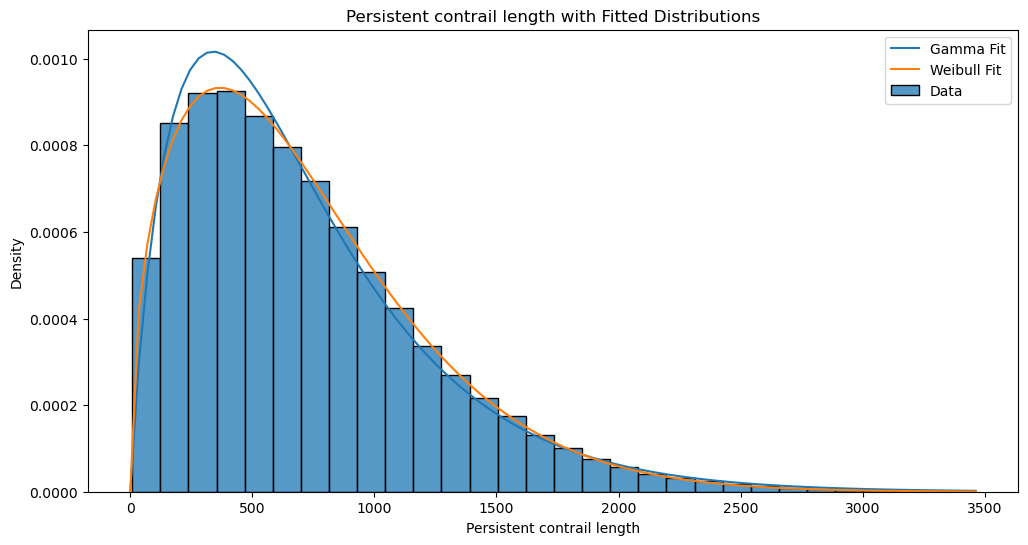

In [56]:
#assess if data follows gamma/weibull distribution

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gamma, weibull_min
import numpy as np

plt.figure(figsize=(12, 6))
sns.histplot(y1_train, kde=False, stat="density", bins=30, label='Data')

# Fit Gamma Distribution
params_gamma = gamma.fit(y1_train, floc=0)

# Fit Weibull Distribution
params_weibull = weibull_min.fit(y1_train, floc=0)

x = np.linspace(y1_train.min(), y1_train.max(), 100)

# PDFs for Fitted Distributions
pdf_gamma = gamma.pdf(x, *params_gamma)
pdf_weibull = weibull_min.pdf(x, *params_weibull)

plt.plot(x, pdf_gamma, label='Gamma Fit')
plt.plot(x, pdf_weibull, label='Weibull Fit')
plt.title('Persistent contrail length with Fitted Distributions')
plt.xlabel('Persistent contrail length')
plt.ylabel('Density')
plt.legend()
plt.show()

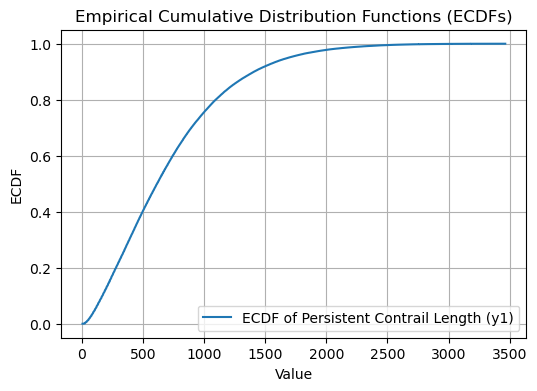

In [35]:
from statsmodels.distributions.empirical_distribution import ECDF
import matplotlib.pyplot as plt

ecdf_y1 = ECDF(y1_train)
x_y1 = np.linspace(min(y1_train), max(y1_train), len(y1_train))
y_ecdf_y1 = ecdf_y1(x_y1)

# Plot ECDFs
plt.figure(figsize=(6, 4))
plt.step(x_y1, y_ecdf_y1, label='ECDF of Persistent Contrail Length (y1)')

plt.xlabel('Value')
plt.ylabel('ECDF')
plt.title('Empirical Cumulative Distribution Functions (ECDFs)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [34]:
from scipy.stats import weibull_min

params_y1 = weibull_min.fit(y1_train, floc=0)  # fix location to zero
shape_y1, loc_y1, scale_y1 = params_y1

(shape_y1, scale_y1)  #shape parameter & scale parameter

(1.4716975849384655, 794.8514150436315)

### gamma regression

In [62]:
import statsmodels.api as sm
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod.families import Gamma
from statsmodels.genmod.families.links import log as log_link
from sklearn.metrics import mean_absolute_error

#add constant to the features
X_train_scaled_const = sm.add_constant(X_train_scaled)
X_val_scaled_const = sm.add_constant(X_val_scaled)
X_test_scaled_const = sm.add_constant(X_test_scaled)

#create & fit Gamma regression model with log link function
gamma_classifier1 = GLM(y1_train, X_train_scaled_const, family=Gamma(link=log_link()))
gamma1 = gamma_classifier1.fit()
print(gamma1.summary())

#evaluate val
y1_pred_val_gammareg = gamma1.predict(X_val_scaled_const)
r2_val_gammareg = r2_score(y1_val, y1_pred_val_gammareg)  #-ve
rmse_val_gammareg = np.sqrt(mean_squared_error(y1_val, y1_pred_val_gammareg))
mae_val_gammareg = mean_absolute_error(y1_val, y1_pred_val_gammareg)
print(f"Gamma Regression Validation Metrics: MSE = {rmse_val_gammareg}, MAE = {mae_val_gammareg}, R2 = {r2_val_gammareg}")

#evaluate test
y1_pred_test_gammareg = gamma1.predict(X_test_scaled_const)
r2_test_gammareg = r2_score(y1_test, y1_pred_test_gammareg)  #-ve
rmse_test_gammareg = np.sqrt(mean_squared_error(y1_test, y1_pred_test_gammareg))
mae_test_gammareg = mean_absolute_error(y1_test, y1_pred_test_gammareg)
print(f"Gamma Regression Test Metrics: MSE = {rmse_test_gammareg}, MAE = {mae_test_gammareg}, R2 = {r2_test_gammareg}")

                 Generalized Linear Model Regression Results                  
Dep. Variable:               y1_train   No. Observations:               213660
Model:                            GLM   Df Residuals:                   213649
Model Family:                   Gamma   Df Model:                           10
Link Function:                    log   Scale:                         0.37678
Method:                          IRLS   Log-Likelihood:            -1.5631e+06
Date:                Thu, 16 Nov 2023   Deviance:                       90722.
Time:                        00:42:14   Pearson chi2:                 8.05e+04
No. Iterations:                    26   Pseudo R-squ. (CS):             0.3255
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.5027      0.001   4896.783      0.0

### Weibull regression

In [29]:
pip install lifelines


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [63]:
import pandas as pd
from lifelines import WeibullAFTFitter

# create df for train
df_train = pd.DataFrame(X_train_scaled)
df_train['Persistent_contrail_length'] = y1_train

# fit weibull
weibull1 = WeibullAFTFitter()
weibull1.fit(df_train, duration_col='Persistent_contrail_length')

# Display the summary
print(weibull1.summary)

                       coef   exp(coef)  se(coef)  coef lower 95%  \
param   covariate                                                   
lambda_ 0         -0.066185    0.935957  0.002833       -0.071738   
        1          0.232299    1.261496  0.001868        0.228637   
        2         -0.345793    0.707659  0.002315       -0.350330   
        3          0.227179    1.255054  0.002773        0.221743   
        4          0.033492    1.034059  0.001795        0.029974   
        5         -0.000410    0.999590  0.003571       -0.007410   
        6         -0.091154    0.912877  0.002058       -0.095188   
        7          0.076022    1.078987  0.002100        0.071906   
        8         -0.076942    0.925944  0.001255       -0.079402   
        9         -0.001160    0.998840  0.003106       -0.007249   
        Intercept  6.619351  749.458633  0.001333        6.616738   
rho_    Intercept  0.537613    1.711915  0.001665        0.534349   

                   coef upper 95%

In [64]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# ensure columns of df_val_scaled and df_test_scaled match df_train
df_val_scaled = pd.DataFrame(X_val_scaled)
df_test_scaled = pd.DataFrame(X_test_scaled)
df_val_scaled.columns = df_train.columns.drop('Persistent_contrail_length')
df_test_scaled.columns = df_train.columns.drop('Persistent_contrail_length')

# predict
y1_pred_val_weibullreg = weibull1.predict_median(df_val_scaled)
y1_pred_test_weibullreg = weibull1.predict_median(df_test_scaled)

# evaluate val
rmse_val_weibullreg = np.sqrt(mean_squared_error(y1_val, y1_pred_val_weibullreg))
mae_val_weibullreg = mean_absolute_error(y1_val, y1_pred_val_weibullreg)
r2_val_weibullreg = r2_score(y1_test, y1_pred_val_weibullreg)  #-ve

# evaluate test
rmse_test_weibullreg = np.sqrt(mean_squared_error(y1_test, y1_pred_test_weibullreg))
mae_test_weibullreg = mean_absolute_error(y1_test, y1_pred_test_weibullreg)
r2_test_weibullreg = r2_score(y1_test, y1_pred_test_weibullreg)  #-ve

print(f"Validation RMSE: {rmse_val_weibullreg}, MAE: {mae_val_weibullreg}, R2 = {r2_val_weibullreg}")
print(f"Test RMSE: {rmse_test_weibullreg}, MAE: {mae_test_weibullreg}, R2 = {r2_test_weibullreg}")

Validation RMSE: 591.5633495145336, MAE: 331.42327000638386, R2 = -1.0713718239117673
Test RMSE: 911.6476668435149, MAE: 342.3256289844213, R2 = -2.271922036537016


## summary

In [66]:
max_length = max(len("lr"), len("rf"), len("xgb"), len("xgb_log"), len("xgb_gamma"), len("ffnn"), len("gammareg"), len("weibullreg"))

print('summary for pcl: ')
print(f"{'lr'.ljust(max_length)}: {rmse_test_lr:.2f}, {mae_test_lr:.2f}, {r2_test_lr:.2f}")
print(f"{'rf'.ljust(max_length)}: {rmse_test_rf:.2f}, {mae_test_rf:.2f}, {r2_test_rf:.2f}")
print(f"{'xgb'.ljust(max_length)}: {rmse_test_xgb:.2f}, {mae_test_xgb:.2f}, {r2_test_xgb:.2f}")
print(f"{'xgb_log'.ljust(max_length)}: {rmse_test_log:.2f}, {mae_test_log:.2f}, {r2_test_log:.2f}")
print(f"{'xgb_gamma'.ljust(max_length)}: {rmse_test_gamma:.2f}, {mae_test_gamma:.2f}, {r2_test_gamma:.2f}")
print(f"{'ffnn'.ljust(max_length)}: {rmse_test_nn:.2f}, {mae_test_nn:.2f}, {r2_test_nn:.2f}")
print(f"{'gammareg'.ljust(max_length)}: {rmse_test_gammareg:.2f}, {mae_test_gammareg:.2f}, {r2_test_gammareg:.2f}")
print(f"{'weibullreg'.ljust(max_length)}: {rmse_test_weibullreg:.2f}, {mae_test_weibullreg:.2f}, {r2_test_weibullreg:.2f}")

summary for pcl: 
lr        : 372.16, 280.86, 0.45
rf        : 301.38, 218.48, 0.64
xgb       : 295.85, 215.69, 0.66
xgb_log   : 319.98, 224.05, 0.60
xgb_gamma : 297.70, 214.01, 0.65
ffnn      : 315.91, 234.90, 0.61
gammareg  : 1244.85, 357.21, -5.10
weibullreg: 911.65, 342.33, -2.27
